# Importing Libraries

In [779]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import (
    Ridge
)
import time

# Data

In [780]:
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=20, random_state=42)

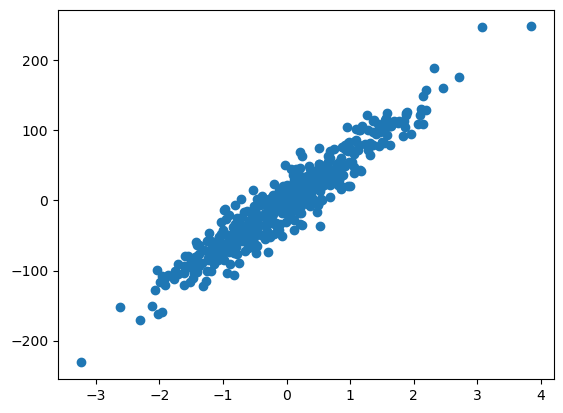

In [781]:
plt.scatter(X.ravel(),y)
plt.show()

In [782]:
X1, y1 = make_regression(n_samples=500, n_features=3, n_informative=3, noise=20, random_state=42)

# Ridge Regression

In [783]:
# closed form solution for 2-D data
class Ridge2d:

    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self, X_train, y_train):

        x_bar = X_train.ravel().mean()
        y_bar = y_train.mean()

        m_num = np.sum((X_train.ravel() - x_bar) * (y_train - y_bar))
        m_den = np.sum(np.square(X_train.ravel() - x_bar)) + self.alpha

        self.coef = m_num / m_den
        self.intercept = y_bar - self.coef * x_bar

    def predict(self, X_test):

        return self.coef * X_test.ravel() + self.intercept

In [784]:
# testing own class
my_model1 = Ridge2d(alpha=100)

In [785]:
my_model1.fit(X, y)

In [786]:
my_model1.coef

52.53335737752036

In [787]:
my_model1.intercept

-0.7087651772874867

In [788]:
# comparing with sklearn's Ridge class
sk_model1 = Ridge(alpha=100,solver='cholesky') # used cholesky solver for closed form solution

In [789]:
sk_model1.fit(X, y)

Ridge(alpha=100, solver='cholesky')

In [790]:
sk_model1.coef_

array([52.53335738])

In [791]:
sk_model1.intercept_

-0.7087651772874866

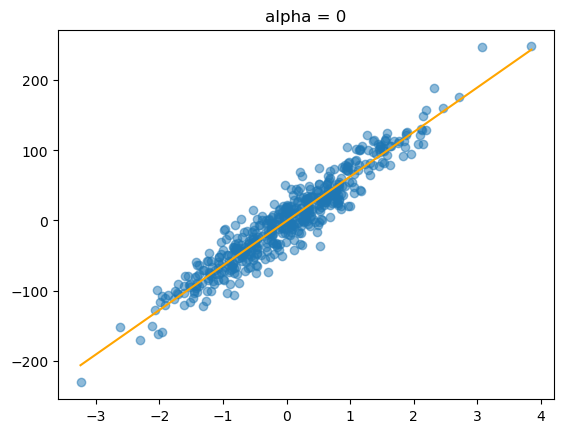

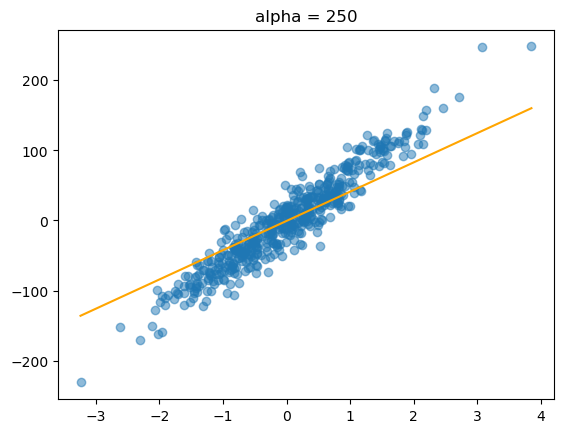

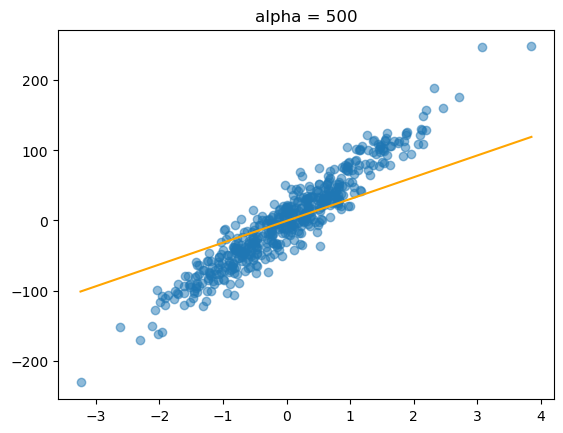

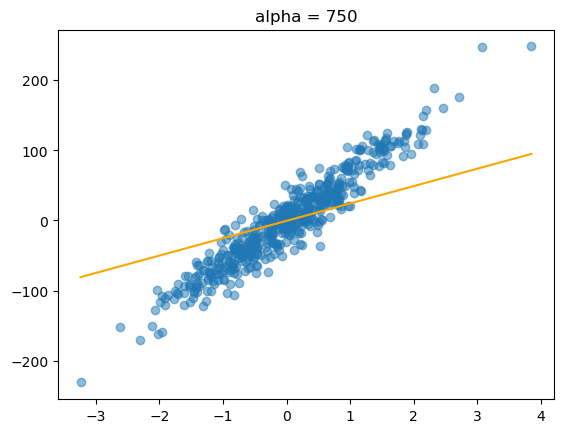

In [792]:
# visualize effects of alpha
alpha_values = np.arange(0,1000,250)

for a in alpha_values:
    model = Ridge(alpha=a, solver='cholesky')
    model.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),100).reshape(-1,1)
    y_pred = model.predict(X_test)
    plt.scatter(X,y,alpha=0.5)
    plt.plot(X_test,y_pred,c='orange')
    plt.title(f'alpha = {a}')
    plt.show()
    time.sleep(1)

For large values of alpha slope will approach zero but will **NEVER** be equal to zero.

In [793]:
# closed form solution for n-D data
class Ridgend:

    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self, X_train, y_train):
    
        # construct design matrix from the training data
        design_matrix = np.insert(X_train,0,1,axis=1)
        identity_matrix = np.identity(design_matrix.shape[1])
        identity_matrix[0][0] = 0 # regularization is not applied on the intercept

        weights = (
            np.linalg.inv(
            design_matrix.T.dot(design_matrix) 
            + self.alpha * identity_matrix
            )
            .dot(design_matrix.T)
            .dot(y_train)
        )

        self.intercept = weights[0]
        self.coef = weights[1:]
        

    def predict(self, X_test):

        return np.dot(X_test,self.coef) + self.intercept

In [794]:
# testing own class
my_model2 = Ridgend(alpha=100)

In [795]:
my_model2.fit(X1, y1)

In [796]:
my_model2.coef

array([21.25453039, 69.36669834, 42.79293939])

In [797]:
my_model2.intercept

0.42270717366302235

In [798]:
# comparing with sklearn's Ridge class
sk_model2 = Ridge(alpha=100, solver='cholesky')
sk_model2.fit(X1,y1)

Ridge(alpha=100, solver='cholesky')

In [799]:
sk_model2.coef_

array([21.25453039, 69.36669834, 42.79293939])

In [800]:
sk_model2.intercept_

0.42270717366302213